# Section 6: Seguridad 

In [1]:
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import  count
import numpy as np
import codecs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## A. Writing Json file with format 
def write_json_UTF8(jsonDir, name_file):
    with open(name_file, 'w') as outfile:
        json.dump(jsonDir, outfile, ensure_ascii=False)
    with codecs.open(name_file, 'r', encoding = "iso-8859-1") as file:
          lines = file.read()
    with codecs.open(name_file, 'w', encoding = 'utf8') as file:
          file.write(lines)
    print("CREATED: ", name_file)

## B. Fixing numbers    
def repair_num(value):
    try:
        aux=float(value)
    except:
        "Existe algun signo"
        aux=""
        for letra in str(value):
            if letra.isdigit():
                aux=aux+letra
            elif letra ==".":
                aux=aux+letra
        if aux=="":
            pass
    
    return float(aux)

## C. Formating Json
def DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening, norm=False):

    globalDir={}
    anioInit=-999
    listData=[]
    dirData={}
    initDir=True
    df_norm=None
    if norm:
        df_copy=df.copy()
        df_norm=(df_copy[varible_v]-df_copy[varible_v].min())/(df_copy[varible_v].max()-df_copy[varible_v].min())
    
    for i, anio, mes, var_value  in zip(count(), df["anio"], df["mesSTR"], df[varible_v]):
        try:
            anio=int(anio)
        except:
            print("set:",anio)
            listData.append(dirData)
            break
            
        #Si todas son nan no sirve
        L=0
        for index ,v_reg in enumerate(varible_v):
            if str(df[v_reg].values[i]) == "nan":
                L=L+1
        if L==len(varible_v):
            print("allNone",anio)
            continue   

        if anioInit<anio:
            if anioInit>0:
                listData.append(dirData)
                dirData={}   
                initDir=True

        if initDir:
            dirData["anio"]=anio
            dirData["regiones"]={}
            for index ,v_reg in enumerate(varible_v):
                dirData["regiones"][reg_name[index]]={"meses":{}}

            initDir=False

        for index ,v_reg in enumerate(varible_v):
            dirData["regiones"][reg_name[index]]["meses"][mes]={}

        for index ,v_reg in enumerate(varible_v):
            #dirData["regiones"][reg_name[index]]["meses"][mes]["indicar_principal"]=df[v_reg].values[i]
            if norm:
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index ]]=round(float(df_norm[v_reg].values[i]),4)
                if (df_norm[v_reg].values[i]) =="nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break
            else:
                # si no hayd data
                data_value= repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """  
                if str(data_value).lower()=="nan" or len(str(data_value).lower())==0:
                    data_value=0
                if data_value- int(data_value)>0.0001:
                    data_value=round(data_value,1)
                else:
                    data_value=int(data_value)
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index ]]=data_value
                if (df[v_reg].values[i]) =="nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break
                    
            if len(toolTip_v[index])>0:
                toolTip_values=[str(df[x].values[i]) for x in toolTip_v[index]]
                tip={}
                #print(index, v_reg, i, df[v_reg].values[i])
                data_value= repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """
                
                if str(data_value).lower()=="nan":
                    data_value="No data"
                else:
                    if data_value- int(data_value)>0.0001:
                        data_value=round(data_value,1)
                    else:
                        data_value=int(data_value)
                tip[variable_meaning[index ]]=data_value

                # add data to tooltipe            
                tip["Fecha: "]=str(int(df["anio"].values[i]))+"/ "+   df["mesSTR"].values[i]   
                for indexTool, name in enumerate( toolTip_mening[index]):
                    tip[name]=toolTip_values[indexTool]
                                                
                dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"]=tip
            else:
                dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"]={}
        anioInit=anio
        
    return listData

## D. Creating image to download
def create_image(df,varible_v,variable_meaning,save_dir):
    print("img",varible_v,variable_meaning)
    objetive_var=varible_v
    plt.close()
    plt.clf()
    df['date'] = df["Mes"].map(str)+ '-' +df["anio"].map(str)
    df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y')
    date=[]
    val=[]
    for i,value in enumerate(df[objetive_var]):
        if str(value)=="nan":
            continue
        else:
            value=repair_num(value)
            val.append(value)
            date.append(df['date'].values[i])
            
    df = pd.DataFrame(columns=['date', objetive_var])
    df['date'] = date
    df[objetive_var]=val
    fig, ax = plt.subplots()
    sns.set_style("darkgrid")
#     print (len(df['date']), len(df[objetive_var]))
    ax = sns.lineplot(x=range(0,len(df['date'])), y=df[objetive_var])

    """
    max_xticks = 11
    xloc = plt.MaxNLocator(max_xticks)
    print(xloc)
    ax.xaxis.set_major_locator(xloc)
    """
    names=[]
    ran=int((len(df['date'])+.5)/10)
    if ran==0:
        ran=1
    if len(df['date']) / ran < 10:
        ran=1
    names=[df['date'].values[d] for d in range(0,len(df['date']),ran)]
    ticklabels = names
    ax.set_xticks(range(0,len(df['date'])+1,ran))
    ax.set_xticklabels(ticklabels)
    fig.autofmt_xdate()
    plt.title(variable_meaning)
    plt.ylabel(variable_meaning)
    plt.savefig(save_dir, dpi=100)
    plt.show()  

def naming_image(x):
    return global_dir + "/img/" + init_data_name + x + '.png'

def naming_file(y):
    return global_dir + "/" + init_data_name + y + '.json'       
    
## E. Reading Data from API 
file='seguridad.xlsx'
global_dir="./data"
norm=False# no normalizada
init_data_name="Seg_"
link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/seguridad.xlsx"
link_img = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/img/"
link_glosario="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header=[ {"titulo":None,"Fuente":None, "LinkDatosOriginales":None, 
               "comment":None, "linkPlot":None,"glosario":None}]     

## Processing Data 

### 1) Seg_01_Empresas_adherentes.json

Index(['anio', 'Mes', 'mesSTR', 'Agricultura, ganadería, caza y silvicultura',
       'Pesca', 'Explotación de minas y canteras', 'Industrias Manufactureras',
       'Suministro de electricidad, gas y agua', 'Construcción',
       'Comercio, reparación de vehículos y otros', 'Hoteles y restaurantes',
       'Transporte, almacenamiento y comunicaciones',
       'Intermediación financiera',
       'Actividades inmobiliarias, empresariales y de alquiler',
       'Administración pública y defensa; planes de seguridad social',
       'Enseñanza', 'Servicios sociales y de salud',
       'Otras actividades de servicios comunitarios, sociales y personales',
       'Hogares privados con servicio doméstico',
       'Organizaciones y órganos extraterritoriales',
       'Part_Agricultura, ganadería, caza y silvicultura', 'Part_Pesca',
       'Part_Explotación de minas y canteras',
       'Part_Industrias Manufactureras',
       'Part_Suministro de electricidad, gas y agua', 'Part_Construcción',
  

<Figure size 432x288 with 0 Axes>

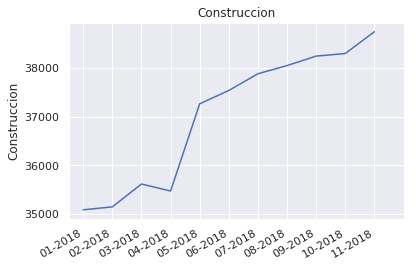

CREATED:  ./data/Seg_01_Empresas_adherentes.json


In [2]:
sheetname = 'Empresas adherentes'
full_file_name = '01_Empresas_adherentes'
info_header[0]["titulo"]="Empresas adherentes al Seguro de Ley sobre accidentes o enfermedad profesional"
info_header[0]["Fuente"]=" Superintendencia de Seguridad Social"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]= "Empresas adherentes al Seguro de Ley sobre accidentes o enfermedad profesional. Fuente: Superintendencia de Seguridad Social"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname=='Empresas adherentes':
    df = pd.read_excel( file, sheet_name = sheetname )
    print(df.columns)
    data=[['Construcción','Part_Construcción']]
    dataCorto=[["Construccion","Participación"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    
    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    jsonDir = [info_header,jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 2) Seg_02_Trabajadadores_protegidos.json

Index(['anio', 'Mes', 'mesSTR', 'Agricultura, ganadería, caza y silvicultura',
       'Pesca', 'Explotación de minas y canteras', 'Industrias Manufactureras',
       'Suministro de electricidad, gas y agua', 'Construcción',
       'Comercio, reparación de vehículos y otros', 'Hoteles y restaurantes',
       'Transporte, almacenamiento y comunicaciones',
       'Intermediación financiera',
       'Actividades inmobiliarias, empresariales y de alquiler',
       'Administración pública y defensa; planes de seguridad social',
       'Enseñanza', 'Servicios sociales y de salud',
       'Otras actividades de servicios comunitarios, sociales y personales',
       'Hogares privados con servicio doméstico',
       'Organizaciones y órganos extraterritoriales',
       'Part_Agricultura, ganadería, caza y silvicultura', 'Part_Pesca',
       'Part_Explotación de minas y canteras',
       'Part_Industrias Manufactureras',
       'Part_Suministro de electricidad, gas y agua', 'Part_Construcción',
  

<Figure size 432x288 with 0 Axes>

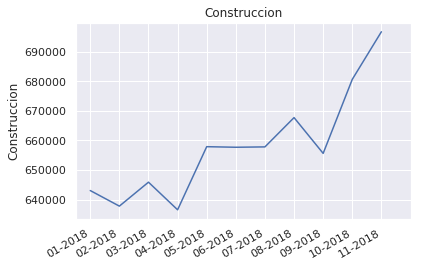

CREATED:  ./data/Seg_02_Trabajadadores_protegidos.json


In [3]:
sheetname = 'Trabajadadores protegidos'
full_file_name = '02_Trabajadadores_protegidos'
info_header[0]["titulo"]= "Trabajadores protegidos por el Seguro de Ley sobre accidentes o enfermedad profesional"
info_header[0]["Fuente"]=" Superintendencia de Seguridad Social"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]= "Empresas adherentes al Seguro de Ley sobre accidentes o enfermedad profesional. Fuente: Superintendencia de Seguridad Social"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname=='Trabajadadores protegidos':
    df = pd.read_excel( file, sheet_name = sheetname )
    print(df.columns)
    data=[['Construcción','Part_Construcción']]
    dataCorto=[["Construccion","Participación"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    
    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    jsonDir = [info_header,jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 3) Seg_03_Trabajadadores_protegidos_porRegion.json

set: None
img De Arica y Parinacota Trabajadores


<Figure size 432x288 with 0 Axes>

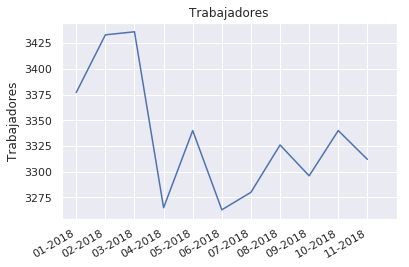

CREATED:  ./data/Seg_03_Trabajadadores_protegidos_porRegion.json


In [4]:
sheetname = 'XREGION'
full_file_name = '03_Trabajadadores_protegidos_porRegion'
info_header[0]["titulo"]= "Trabajadores protegidos por el Seguro de Ley sobre accidentes o enfermedad profesional por región"
info_header[0]["Fuente"]="Superintendencia de Seguridad Social"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]= "Trabajadores protegidos por el Seguro de Ley sobre accidentes o enfermedad profesional por región. Fuente Superintendencia de Seguridad Social"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"]=""

if sheetname=='XREGION':
    df = pd.read_excel( file, sheet_name = sheetname )
    varible_v=[ 'De Arica y Parinacota',
        'De Tarapacá',
        'De Antofagasta',
        'De Atacama',
        'De Coquimbo',
        'De Valparaíso',
        "Del Libertador Gral. Bdo. O'Higgins",
        'Del Maule',
        'De Ñuble',
        'Del Biobío',
        'De La Araucanía',
        'De Los Ríos',
        'De Los Lagos',
        'Aysén del Gral. Carlos Ibáñez del Campo',
        'De Magallanes y la Antártica Chilena',	'Metropolitana de Santiago'
    ]
    variable_meaning=["Trabajadores","Trabajadores","Trabajadores","Trabajadores",
                      "Trabajadores","Trabajadores","Trabajadores",
                      "Trabajadores","Trabajadores","Trabajadores","Trabajadores",
                      "Trabajadores","Trabajadores","Trabajadores","Trabajadores",
                      "Trabajadores","Trabajadores","Trabajadores",
                      "Trabajadores","Trabajadores","Trabajadores"
    ]

    #Nombre de la region 
    reg_name=[ 'De Arica y Parinacota',
        'De Tarapacá',
        'De Antofagasta',
        'De Atacama',
        'De Coquimbo',
        'De Valparaíso',
        "Del Libertador Gral. Bdo. O'Higgins",
        'Del Maule',
        'De Ñuble',
        'Del Biobío',
        'De La Araucanía',
        'De Los Ríos',
        'De Los Lagos',
        'Aysén del Gral. Carlos Ibáñez del Campo',
        'De Magallanes y la Antártica Chilena',	'Metropolitana de Santiago'
    ]

    toolTip_v=[
        ['Part_De Arica y Parinacota'],
        ['Part_De Tarapacá'],
        ['Part_De Antofagasta'],
        ['Part_De Atacama'],
        ['Part_De Coquimbo'],
        ['Part_De Valparaíso'],
        ["Part_Del Libertador Gral. Bdo. O'Higgins"],
        ['Part_Del Maule'],
        ['Part_De Ñuble'],
        ['Part_Del Biobío'],
        ['Part_De La Araucanía'],
        ['Part_De Los Ríos'],
        ['Part_De Los Lagos'],
        ['Part_Aysén del Gral. Carlos Ibáñez del Campo'],
        ['Part_De Magallanes y la Antártica Chilena'],
        ['Part_Metropolitana de Santiago']
    ]
    
    toolTip_mening=[["Participación"],["Participación"],["Participación"],["Participación"],
                   ["Participación"],["Participación"],["Participación"],["Participación"],
                   ["Participación"],["Participación"],["Participación"],["Participación"],
                   ["Participación"],["Participación"],["Participación"],["Participación"],
                   ["Participación"],["Participación"],["Participación"],["Participación"]
    ]
    

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)       

### 4) Seg_04_Tasa_Accidentes.json

set: None
img Tasa acc Tasa acc


<Figure size 432x288 with 0 Axes>

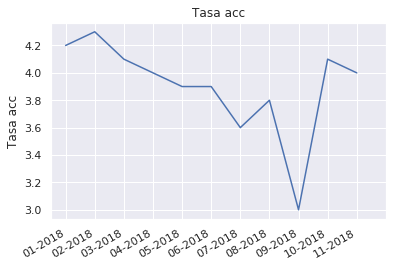

CREATED:  ./data/Seg_04_Tasa_Accidentes.json


In [5]:
sheetname ="Accidentabilidad2"
full_file_name = '04_Tasa_Accidentes'
info_header[0]["titulo"] = "Accidentes, Tasa de accidentabilidad y Tasa de mortalidad"
info_header[0]["Fuente"] = "Encuesta innovación"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Los accidentes, enfermedades y tasas de accidentabilidad están sólo disponibles para trabajadores protegidos por Mutuales, sin contabilizar el ISL (Instituto de Seguridad Laboral). Tasa de mortalidad es sólo por acc. del trabajo y corresponde al Nº de fallecidos por acc. del trabajo dividido por el Nº de trabajadores protegidos, por cada 100.000 trabajadores. Fuente: Superintendencia de Seguridad Social"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == "Accidentabilidad2":
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Tasa acc"]]
    dataCorto = [["Tasa acc"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    